In [1]:
"""
Created on Sat Jan 23 19:50:11 2021

@author: morrismr
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
full = pd.read_csv(r'C:\Users\morrismr\Downloads\anes_timeseries_cdf\anes_timeseries_cdf_rawdata.txt', low_memory=False)



In [3]:

df16 = full[full.VCF0004 == 2016]
df12 = full[full.VCF0004 == 2012]
print(df16.head())
print(df12.head())
print('Taking a look at the structure of this dataset. It includes responsdents answers to a massive set of questions, indexed by year.')


                            Version  VCF0004  VCF0006  VCF0006a  VCF0009x  \
55674  ANES_CDF_VERSION:2019-Sep-10     2016        1  20160001     0.887   
55675  ANES_CDF_VERSION:2019-Sep-10     2016        2  20160002     1.160   
55676  ANES_CDF_VERSION:2019-Sep-10     2016        3  20160003     0.416   
55677  ANES_CDF_VERSION:2019-Sep-10     2016        4  20160004     0.385   
55678  ANES_CDF_VERSION:2019-Sep-10     2016        5  20160005     0.693   

       VCF0010x  VCF0011x  VCF0009y  VCF0010y  VCF0011y  ...  VCF9272  \
55674     0.887     0.887       0.0       0.0       0.0  ...        4   
55675     1.160     1.160       0.0       0.0       0.0  ...        1   
55676     0.416     0.416       0.0       0.0       0.0  ...        4   
55677     0.385     0.385       0.0       0.0       0.0  ...        3   
55678     0.693     0.693       0.0       0.0       0.0  ...        4   

       VCF9273  VCF9274 VCF9275  VCF9277  VCF9278 VCF9279 VCF9280  VCF9281  \
55674        4      

In [4]:
print(full.VCF0004.value_counts())
print('This lets us know how many survey answer records we had per year. Generally, it increased at time went on')

2012    5914
2016    4270
1972    2705
1992    2485
2008    2322
1978    2304
1984    2257
1976    2248
1986    2176
1988    2040
1990    1980
1952    1899
2000    1807
1994    1795
1956    1762
1996    1714
1980    1614
1974    1575
1964    1571
1968    1557
2002    1511
1970    1507
1958    1450
1982    1418
1962    1297
1966    1291
1998    1281
2004    1212
1960    1181
1954    1139
1948     662
Name: VCF0004, dtype: int64
This lets us know how many survey answer records we had per year. Generally, it increased at time went on


In [5]:

def fixMissingAgeGroups(age_distr_counts):
    
    age_distr_counts = sp.VCF0004.value_counts()
    age_distr_counts = age_distr_counts[age_distr_counts < 8]
    lower_years = age_distr_counts.index
    
    
    i = sp.shape[0] + 1
    for year in lower_years:
        sp.loc[i] = year, 7, 0.0
        i = i+1
        
    sp.sort_values(by=['VCF0004', 'VCF0102'], inplace=True)
    return sp


In [6]:

def getPercentageOverTime(col_name):

    raw_count_df = full.groupby(['VCF0004', col_name]).agg({col_name: 'count'})
    # Change: groupby state_office and divide by sum
    gp = raw_count_df.groupby(level=0).apply(lambda x:
                                                     100 * x / float(x.sum()))
    
    #Undoing the multi-index
    gp.rename(columns = {col_name: col_name + '_pct'}, inplace=True)
    gp.reset_index(inplace=True)
        

    #confirming that each percentage sums to 100
#     print(gp[gp.VCF0004 == 1952].sum())
    gp.VCF0004.value_counts()
    return gp



In [7]:
def plotOverTime(mydf, times_, col_name, mylabels, mytitle):
    

    year_vals = []
    for year in times_:
        year_vals.append(mydf[mydf['VCF0004'] == year][col_name])

    year_vals = np.stack(year_vals)
    year_vals =year_vals.T
    
    #stacked area chart
    plt.plot()
    # Make the plot
    
    
    # age_labels.reverse()
    plt.stackplot(times_, year_vals, labels=mylabels)
    plt.legend(loc='upper left')
    plt.margins(0,0)
    plt.title(mytitle)
    plt.show()



In [8]:
def compressAgeNumbers(x):
    if x in [0,1]:
        return 1
    elif x in [2,3,4]:
        return 2
    else:
        return 3
    
def compressThermometer(x):
    if x == 0:
        return 0
    if x in [1,25]:
        return 1
    elif x in [25,50]:
        return 2
    elif x in [50,75]:
        return 3
    elif x in [76,100]:
        return 4

    # source for this function: https://stackoverflow.com/questions/40531255/how-to-replace-empty-cells-with-0-and-change-strings-to-integers-where-possible/40531388
def recode_empty_cells(dataframe, list_of_columns):

    for column in list_of_columns:
      dataframe[column] = dataframe[column].replace(r'\s+', np.nan, regex=True)
      dataframe[column] = dataframe[column].fillna(0)

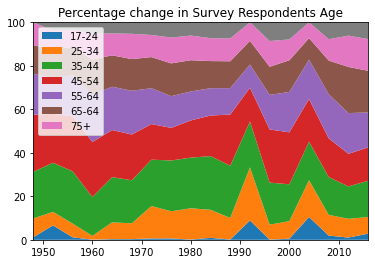

In [9]:
sp = getPercentageOverTime('VCF0102')
fixed_sp = fixMissingAgeGroups(sp.VCF0004.value_counts())
sp = fixed_sp.copy()


# =============================================================================
# s48 = sp[sp['VCF0004'] == 1948][['VCF0102', 'VCF0102_pct']]
# s52 = sp[sp['VCF0004'] == 1952]['VCF0102_pct']
# sp[sp['VCF0004'] == 1956]['VCF0102_pct']
# 
# =============================================================================

times = np.arange(1948, 2020, 4)
age_labels = ['17-24', '25-34', '35-44', '45-54', '55-64', '65-64', '75+']
plotOverTime(sp, times, 'VCF0102_pct', age_labels, 'Percentage change in Survey Respondents Age') 


In [10]:
print(5)

5


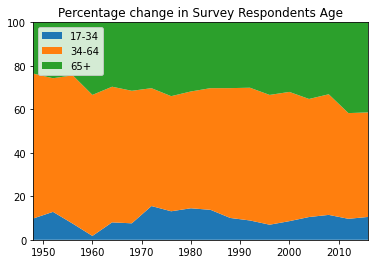

In [11]:
full['age_clusters'] = full['VCF0102'].apply(compressAgeNumbers)  
ap = getPercentageOverTime('age_clusters')
# fixed_ap = fixMissingAgeGroups(ap.VCF0004.value_counts())
# ap = fixed_ap.copy()
smaller_age_labels = ['17-34', '34-64','65+' ]
plotOverTime(ap, times, 'age_clusters_pct', smaller_age_labels, 'Percentage change in Survey Respondents Age')

In [12]:
def recode_empty_cells(dataframe, list_of_columns):

    for column in list_of_columns:
      dataframe[column] = dataframe[column].replace(r'\s+', np.nan, regex=True)
      dataframe[column] = dataframe[column].fillna(0)

    return dataframe
full2 = recode_empty_cells(full, ['VCF0229'])
full['VCF0229'].fillna(0, inplace=True)
full['VCF0229'] = full['VCF0229'].astype(int)
full['env_therm'] = full['VCF0229'].apply(compressThermometer)

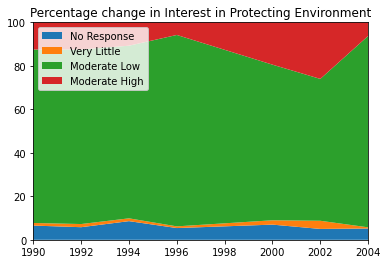

In [13]:
ap = getPercentageOverTime('env_therm')
# fixed_ap = fixMissingAgeGroups(ap.VCF0004.value_counts())
# ap = fixed_ap.copy()
smaller_age_labels = ['No Response', 'Very Little', 'Moderate Low', 'Moderate High', 'Very Much']
env_therm_times = np.arange(1990, 2006, 2)
b = np.array(1998)
env_therm_times = np.setdiff1d(env_therm_times, b)
ap2 = ap[(ap.VCF0004 < 2006) & (ap.VCF0004 > 1988)]
ap2 = ap2[ap2.VCF0004 != 1998 ]
plotOverTime(ap2, env_therm_times, 'env_therm_pct', smaller_age_labels, 'Percentage change in Interest in Protecting Environment')


In [14]:
print('done!')

done!
